In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")

train = pd.read_csv('C:\\Users\\aagam\\Desktop\\db51cad4-e-Dataset-1\\Dataset-1\\competition_first_train.csv')
test  = pd.read_csv('C:\\Users\\aagam\\Desktop\\db51cad4-e-Dataset-1\\Dataset-1\\competition_first_test.csv')

print 'Train Dimensions: ',train.shape
print 'Number of Null values in columns: ', train[train.columns].isnull().sum()
print '-'*20
print 'Test Dimensions: ',test.shape
print 'Number of Null values in columns: ', test[test.columns].isnull().sum()

Train Dimensions:  (65000, 10)
Number of Null values in columns:  ID            0
a             0
b             0
c             0
d             0
e             0
f          6557
g             0
h             0
predict       0
dtype: int64
--------------------
Test Dimensions:  (23758, 9)
Number of Null values in columns:  ID       0
a        0
b        0
c        0
d        0
e        0
f     2433
g        0
h        0
dtype: int64


### Imputing Missing Values

In [2]:
train['f'].fillna(train['f'].median(),inplace=True)

In [3]:
test['f'].fillna(test['f'].median(),inplace=True)

In [4]:
train.dtypes

ID          object
a            int64
b            int64
c            int64
d            int64
e            int64
f          float64
g            int64
h            int64
predict      int64
dtype: object

In [5]:
test.dtypes

ID     object
a       int64
b       int64
c       int64
d       int64
e       int64
f     float64
g       int64
h       int64
dtype: object

### Converting float64 to int64

In [6]:
train['f'] = train['f'].astype('int64')
train.dtypes

ID         object
a           int64
b           int64
c           int64
d           int64
e           int64
f           int64
g           int64
h           int64
predict     int64
dtype: object

In [7]:
test['f'] = test['f'].astype('int64')
test.dtypes

ID    object
a      int64
b      int64
c      int64
d      int64
e      int64
f      int64
g      int64
h      int64
dtype: object

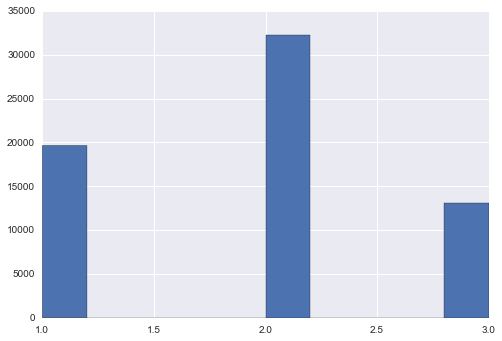

In [15]:
train['h'].hist()

In [16]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(train['b'])
encoded_b = encoder.transform(train['b'])
dummy_b = np_utils.to_categorical(encoded_b)

encoder.fit(train['c'])
encoded_c = encoder.transform(train['c'])
dummy_c = np_utils.to_categorical(encoded_c)

encoder.fit(train['d'])
encoded_d = encoder.transform(train['d'])
dummy_d = np_utils.to_categorical(encoded_d)

encoder.fit(train['h'])
encoded_h = encoder.transform(train['h'])
dummy_h = np_utils.to_categorical(encoded_h)

Using Theano backend.


In [21]:
train.head()

,ID,a,b,c,d,e,f,g,h,predict
0,F00000001,188,1,0,1,0,0,0,1,0
1,F00000003,209,1,0,1,0,0,0,2,1
2,F00000004,257,1,0,1,0,0,0,2,1
3,F00000005,257,1,1,1,0,0,0,2,1
4,F00000006,342,1,0,1,0,0,0,2,1


In [24]:
features = ['a','e','f','g']

In [27]:
type(dummy_b)

numpy.ndarray

### Creating Dummy columns for rich features

In [30]:
rich_features = pd.concat([train[['a','e','f','g']],
                           pd.get_dummies(train['b'], prefix='b'),
                           pd.get_dummies(train['c'], prefix='c'),
                           pd.get_dummies(train['d'], prefix='d'),
                           pd.get_dummies(train['h'], prefix='h')],
                          axis=1)
rich_features.head(5)

,a,e,f,g,b_0,b_1,c_0,c_1,d_1,d_2,d_3,h_1,h_2,h_3
0,188,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,209,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,257,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,257,0,0,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,342,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [35]:
rich_features_1 = rich_features.drop('b_0',1)
rich_features_1 = rich_features_1.drop('c_0',1)

rich_features_1.head()

,a,e,f,g,b_1,c_1,d_1,d_2,d_3,h_1,h_2,h_3
0,188,0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,209,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,257,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,257,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,342,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [46]:
rich_features_test = pd.concat([test[['a','e','f','g']],
                           pd.get_dummies(test['b'], prefix='b'),
                           pd.get_dummies(test['c'], prefix='c'),
                           pd.get_dummies(test['d'], prefix='d'),
                           pd.get_dummies(test['h'], prefix='h')],
                          axis=1)
rich_features_test.head(5)

,a,e,f,g,b_0,b_1,c_0,c_1,d_1,d_2,d_3,h_1,h_2,h_3
0,531,20,28,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,531,20,25,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,531,20,29,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,531,30,11,18,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,531,30,28,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


### b_0 and c_0 are just opposite of b_1 and c_1 so just drop these features

In [47]:
rich_features_test = rich_features_test.drop('b_0',1)
rich_features_test = rich_features_test.drop('c_0',1)

rich_features_test.head()

,a,e,f,g,b_1,c_1,d_1,d_2,d_3,h_1,h_2,h_3
0,531,20,28,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,531,20,25,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,531,20,29,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,531,30,11,18,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,531,30,28,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [36]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

#features = ['a','b','c','d','e','f','g','h']

X_train, X_test, y_train, y_test = train_test_split(rich_features_1,train['predict'], test_size=0.20, random_state=7)

In [37]:
print y_train.mean()
print y_test.mean()

0.193730769231
0.189153846154


In [42]:
dir = r'C:\Program Files\mingw-w64\x86_64-6.2.0-posix-seh-rt_v5-rev1\mingw64\bin'
import os
os.environ['PATH'].count(dir) # Here I show its already in the path at least once
os.environ['PATH'].find(dir)
os.environ['PATH'] = dir + ';' + os.environ['PATH'] # I put it on the beginning of the path, NOT THE END.

### Random Forest

In [39]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

#features = ['a','b','c','d','e','f','g','h']

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, rich_features_1, train['predict'], cv=5, n_jobs=4,scoring='accuracy')
print("Random Forest CV scores:")
print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(
    scores.min(), scores.mean(), scores.max()))

Random Forest CV scores:
min: 0.822, mean: 0.823, max: 0.825
Wall time: 1min 12s


### Xgboost

In [44]:
%%time
model = XGBClassifier()
results = cross_val_score(model, rich_features_1, train['predict'], cv=5, n_jobs=4)
print("Accuracy: %.2f%% Std.Dev. (%.2f%%)" % (results.mean()*100, results.std()*100))
print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(
    results.min(), results.mean(), results.max()))

Accuracy: 84.24% Std.Dev. (0.05%)
min: 0.842, mean: 0.842, max: 0.843
Wall time: 34.8 s


### Confusion Metrics

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10759   119     0]
 [ 1558   227     0]
 [  263    74     0]]


In [55]:
X_train.shape

(52000, 12)

### Prediction and Saving in file

In [48]:
model.fit(rich_features_1,train['predict'])
predictions = model.predict(rich_features_test)
file_submit=pd.DataFrame()
file_submit['Id']=test["ID"]
file_submit['Prediction']=predictions
print file_submit.head()
file_submit.to_csv("C:/Users/aagam/Desktop/class_xgboost.csv")

          Id  Prediction
0  F00113999           0
1  F00114000           0
2  F00114002           0
3  F00114004           0
4  F00114005           0


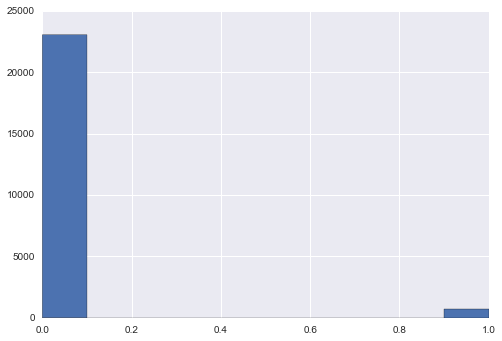

In [49]:
file_submit['Prediction'].hist()

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Accuracy of Logistic Predictions

In [51]:
target_predicted = logreg.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, target_predicted)

0.83915384615384614

### Confusion Metrics

In [52]:
cm = confusion_matrix(y_test, target_predicted)
print(cm)

[[10694   184     0]
 [ 1570   215     0]
 [  282    55     0]]


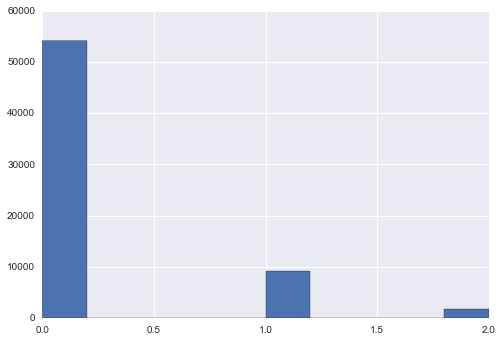

In [34]:
train['predict'].hist()

In [50]:
train.describe()

,a,b,c,d,e,f,g,h,predict
count,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000
mean,1399.722431,0.283508,0.453092,2.268815,25.858538,28.631646,9.531523,1.898369,0.192815
std,851.160795,0.450704,0.497799,0.464231,15.535892,11.825734,9.896372,0.701966,0.456250
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [51]:
train.groupby('predict').count()

,ID,a,b,c,d,e,f,g,h
predict,,,,,,,,,
0,54174,54174,54174,54174,54174,54174,54174,54174,54174
1,9119,9119,9119,9119,9119,9119,9119,9119,9119
2,1707,1707,1707,1707,1707,1707,1707,1707,1707


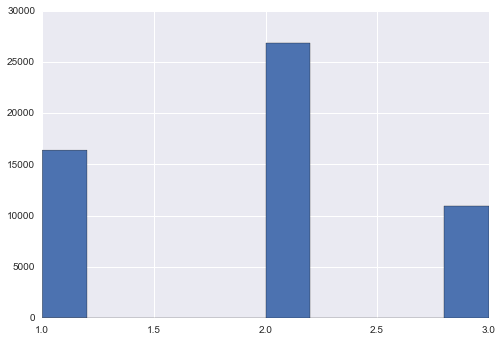

In [74]:
train['h'][train['predict']==0].hist()

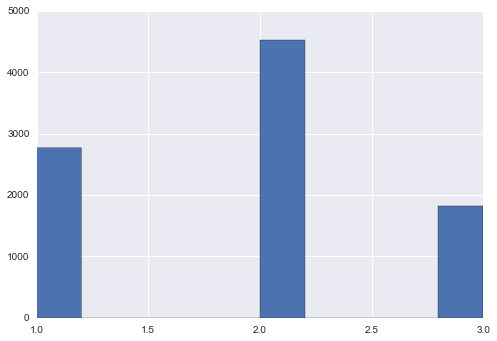

In [75]:
train['h'][train['predict']==1].hist()

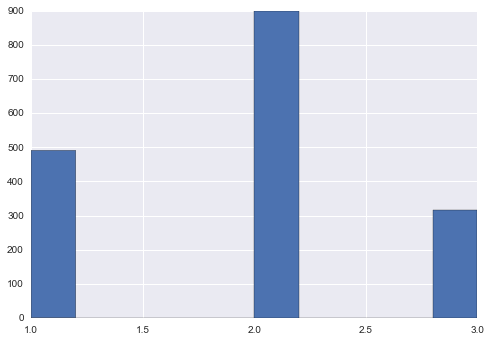

In [76]:
train['h'][train['predict']==2].hist()

### Performing Grid Search for parameter tuning

In [18]:
%%time

from sklearn.grid_search import GridSearchCV
features = ['a','b','c','d','e','f','g','h']

params = {
    'learning_rate': [0.05, 0.1, 0.5],'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)
}
gs = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=4)
gs.fit(train[features], train['predict'])

Wall time: 16min 3s


In [19]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

[mean: 0.84531, std: 0.00157, params: {'learning_rate': 0.5, 'max_depth': 3, 'min_child_weight': 5},
 mean: 0.84497, std: 0.00127, params: {'learning_rate': 0.5, 'max_depth': 3, 'min_child_weight': 3},
 mean: 0.84491, std: 0.00184, params: {'learning_rate': 0.5, 'max_depth': 3, 'min_child_weight': 1},
 mean: 0.84431, std: 0.00116, params: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5},
 mean: 0.84420, std: 0.00151, params: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3},
 mean: 0.84374, std: 0.00193, params: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5},
 mean: 0.84371, std: 0.00156, params: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1},
 mean: 0.84369, std: 0.00144, params: {'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 5},
 mean: 0.84368, std: 0.00178, params: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3},
 mean: 0.84349, std: 0.00187, params: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_we